<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/Copy_of_fft_r3-xgbb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-normal-n-0-3-r3.csv?token=AKVFSOGV32UXUS6DMR67GU26ZLJ4S')
print(df.shape)
df

(77850, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,1,0,1,1,4,3,9,3,3,23,7,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9,1
1,19,1,4,1,1,4,3,9,0,0,23,7,1,4,3,0.75,16,7,2,8,14,112,4,1,4,4,3,27,9,1
2,54,0,1,4,1,1,5,17,23,7,3,3,2,1,1,1.00,8,6,3,8,18,144,0,4,4,8,20,85,100,1
3,55,0,1,4,2,2,5,17,23,7,3,3,2,1,1,1.00,9,5,4,8,20,160,0,8,16,32,20,85,100,1
4,56,0,1,4,3,2,5,17,23,7,3,3,2,1,1,1.00,10,4,5,8,20,160,0,12,24,48,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77845,3269151,1,0,5,2,2,3,11,3,3,27,11,20046,2,0,0.00,11,5,2,6,10,60,0,10,20,400920,15,33,45,1
77846,3269158,1,0,5,3,2,3,11,3,3,27,11,20046,2,0,0.00,18,4,3,6,12,72,0,15,30,601380,15,33,45,1
77847,3269165,1,0,5,4,2,3,11,3,3,27,11,20046,2,0,0.00,25,3,4,6,12,72,0,20,40,801840,15,33,45,1
77848,3269172,1,0,5,5,3,3,11,3,3,27,11,20046,2,0,0.00,32,2,5,6,10,60,0,25,75,1503450,15,33,45,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-1-r3.csv?token=AKVFSOED5QIMBBZMRWKL5RK6ZLJ6E')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-6-r3.csv?token=AKVFSOCF2RWY4DBUWHCI2A26ZLJ6G')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-9-r3.csv?token=AKVFSOE7FA4BBTXMYW2CTFS6ZLJ6K')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-14-r3.csv?token=AKVFSOFHVC64J4IPRKF7MGS6ZLJ6O')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-normal-n-0-5-r3.csv?token=AKVFSOAT3AG4KKVTRPRAW6S6ZLKBQ')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-normal-n-0-12-r3.csv?token=AKVFSOCKTYXLR4LPHFWFZ6S6ZLKBU')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-normal-n-0-15-r3.csv?token=AKVFSOC2RUNNPTZC6WLUU5C6ZLKBW')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(90765, 30)
(85061, 30)
(84824, 30)
(84840, 30)
(19460, 30)
(19424, 30)
(20553, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,1,0,1,1,4,3,9,3,3,23,7,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9,1
1,7,1,0,1,1,4,3,9,3,3,23,7,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9,0
2,7,1,0,1,1,4,3,9,3,3,23,7,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9,0
3,7,1,0,1,1,4,3,9,3,3,23,7,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9,0
4,7,1,0,1,1,4,3,9,3,3,23,7,3,1,0,0.00,4,9,1,9,9,81,0,1,4,12,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482772,3273672,4,0,2,1,4,3,11,19,3,20,4,20040,4,0,0.00,32,1,1,1,1,1,0,2,8,160320,6,33,18,1
482773,3273673,1,0,7,1,4,3,12,19,3,15,15,20039,3,0,0.00,5,1,1,1,1,1,0,7,28,561092,21,36,63,1
482774,3273744,0,1,3,1,4,3,9,20,4,19,3,20040,4,4,1.00,24,1,1,1,1,1,0,3,12,240480,9,27,27,1
482775,3275116,1,4,7,1,4,3,9,17,1,15,15,20055,5,2,0.40,14,1,1,1,1,1,4,7,28,561540,21,27,63,1


In [0]:
df.shape

(482777, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-2-r3.csv?token=AKVFSOHR6MYZTLLLRXNNZMC6ZLKFI')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-5-r3.csv?token=AKVFSODTC3WK6GTLGRX6X4C6ZLKFM')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-10-r3.csv?token=AKVFSOHMNRWE653CLJJ35G26ZLKFS')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-12-r3.csv?token=AKVFSOETXVMN64SRNQJMP4S6ZLKFU')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-13-r3.csv?token=AKVFSOEM2I5TF47A7G65EKS6ZLKFY')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-15-r3.csv?token=AKVFSOGTD7T3K67EG6N7W7S6ZLKF2')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-normal-n-0-10-r3.csv?token=AKVFSOA5FZJJKBXEPARIWBK6ZLKKE')
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(90774, 30)
(84825, 30)
(84838, 30)
(85082, 30)
(85079, 30)
(86230, 30)
(19460, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,1,0,1,1,4,3,9,3,3,23,7,3,1,0,0.00,4,9,1,9,9,81,0,1,4,12,3,27,9,0
1,11,1,4,1,1,4,3,9,2,2,23,7,2,2,1,0.50,8,8,2,9,16,144,4,1,4,8,3,27,9,0
2,19,1,4,1,1,4,3,9,0,0,23,7,1,4,3,0.75,16,7,3,9,21,189,4,1,4,4,3,27,9,0
3,54,0,1,4,1,1,5,17,23,7,3,3,3,1,1,1.00,8,6,4,9,24,216,0,4,4,12,20,85,100,0
4,55,0,1,4,2,2,5,17,23,7,3,3,3,1,1,1.00,9,5,5,9,25,225,0,8,16,48,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90769,3270576,0,1,4,5,3,5,17,23,7,3,3,30068,1,1,1.00,16,1,6,6,6,36,0,20,60,1804080,20,85,100,0
90770,3270661,1,0,5,1,1,3,11,3,3,27,11,30069,2,0,0.00,4,4,1,4,4,16,0,5,5,150345,15,33,45,0
90771,3270668,1,0,5,2,2,3,11,3,3,27,11,30069,2,0,0.00,11,3,2,4,6,24,0,10,20,601380,15,33,45,0
90772,3270675,1,0,5,3,2,3,11,3,3,27,11,30069,2,0,0.00,18,2,3,4,6,24,0,15,30,902070,15,33,45,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.496116,0.124086,-0.003932,0.006000,-0.542992,-0.422787,0.000149,0.162425,-0.733469,-0.853880,-0.132335,-0.118481,0.127147,0.005735,0.025568,0.029721,-0.117688,0.115082,0.076489,0.050626,-0.279325,-0.500081,-0.483061,0.001811
inport,-0.496116,1.000000,-0.036553,-0.015491,0.023659,-0.028648,-0.149231,-0.020911,0.232952,0.529278,0.535021,0.353396,0.031396,-0.104981,-0.048697,-0.014030,0.004285,0.717751,-0.037816,-0.024428,-0.026835,-0.052247,-0.077030,-0.045077,0.138240
cache_coherence_type,0.124086,-0.036553,1.000000,0.204498,-0.312234,-0.214445,-0.255304,0.003353,0.003245,-0.116869,-0.118005,-0.388020,0.054719,-0.050273,0.002942,0.026286,0.031955,-0.034396,0.432894,0.376845,0.255118,0.717352,-0.232744,0.241521,0.027822
flit_id,-0.003932,-0.015491,0.204498,1.000000,-0.001021,0.164504,0.148377,0.014498,0.000817,0.001792,0.011891,0.408971,-0.052113,0.096113,0.029119,0.054196,0.032387,0.004149,0.954736,0.904317,0.641124,0.295319,0.159600,0.256396,-0.017544
flit_type,0.006000,0.023659,-0.312234,-0.001021,1.000000,-0.251180,-0.226554,-0.022170,-0.001249,-0.002744,-0.018156,0.469661,-0.152810,0.126568,-0.017367,-0.041757,-0.023380,-0.006328,-0.058933,0.209697,0.145676,-0.450911,-0.243691,-0.391483,0.026797
vnet,-0.542992,-0.028648,-0.214445,0.164504,-0.251180,1.000000,0.961606,0.027387,-0.078601,0.490274,0.648561,-0.136552,0.080820,-0.041439,0.026061,-0.018383,-0.050083,-0.213939,-0.012358,-0.041827,-0.015759,0.526671,0.993986,0.896027,-0.114931
vc,-0.422787,-0.149231,-0.255304,0.148377,-0.226554,0.961606,1.000000,0.020887,-0.102527,0.367349,0.516203,-0.156515,0.068605,-0.007188,0.040644,-0.005995,-0.039601,-0.279954,-0.025513,-0.055028,-0.031614,0.463724,0.985875,0.839310,-0.126148
traversal_id,0.000149,-0.020911,0.003353,0.014498,-0.022170,0.027387,0.020887,1.000000,0.003470,-0.016193,-0.013652,-0.010859,0.115997,0.116070,0.153578,0.115832,0.091608,0.014287,0.006056,0.003486,0.564317,0.022453,0.025048,0.028733,-0.272387
hop_count,0.162425,0.232952,0.003245,0.000817,-0.001249,-0.078601,-0.102527,0.003470,1.000000,0.417621,0.046318,0.333719,-0.071827,-0.027193,-0.065529,-0.032710,-0.017299,0.365058,0.022047,0.011224,0.009814,-0.053242,-0.088879,-0.076616,0.112100
current_hop,-0.733469,0.529278,-0.116869,0.001792,-0.002744,0.490274,0.367349,-0.016193,0.417621,1.000000,0.845512,0.344001,0.057337,-0.140793,-0.055229,-0.054706,-0.046739,0.226675,-0.100274,-0.068111,-0.054070,0.248003,0.445787,0.433966,0.054698


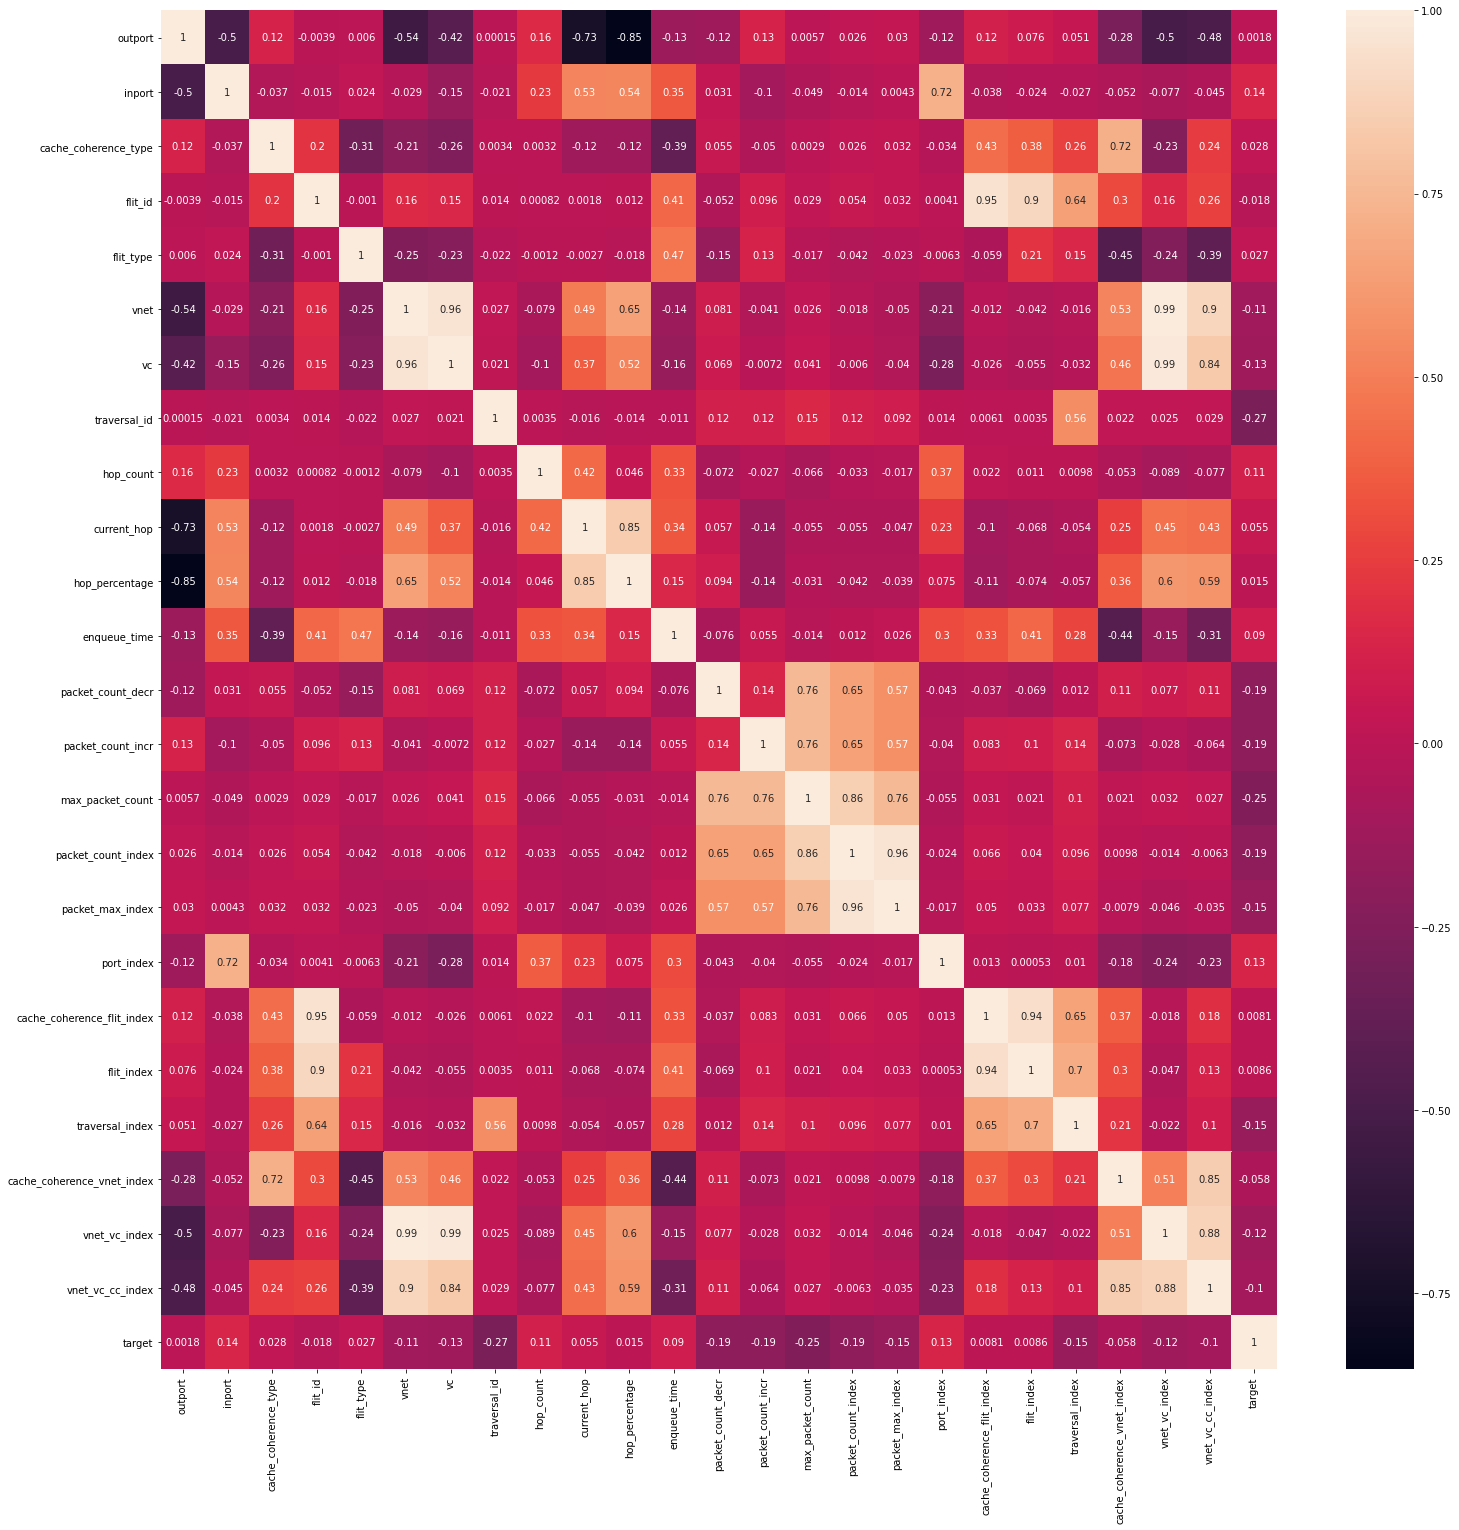

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1,0,1,1,4,3,9,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9
1,1,0,1,1,4,3,9,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9
2,1,0,1,1,4,3,9,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9
3,1,0,1,1,4,3,9,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9
4,1,0,1,1,4,3,9,3,1,0,0.00,4,9,1,9,9,81,0,1,4,12,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482772,4,0,2,1,4,3,11,20040,4,0,0.00,32,1,1,1,1,1,0,2,8,160320,6,33,18
482773,1,0,7,1,4,3,12,20039,3,0,0.00,5,1,1,1,1,1,0,7,28,561092,21,36,63
482774,0,1,3,1,4,3,9,20040,4,4,1.00,24,1,1,1,1,1,0,3,12,240480,9,27,27
482775,1,4,7,1,4,3,9,20055,5,2,0.40,14,1,1,1,1,1,4,7,28,561540,21,27,63


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.0,1.0,0.0,0.000,0.000033,0.166667,0.000000,0.00,0.000000,0.21875,0.0,0.21875,0.024306,0.006607,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.25,0.00,0.000000,0.0,1.0,0.0,0.000,0.000033,0.166667,0.000000,0.00,0.000000,0.21875,0.0,0.21875,0.024306,0.006607,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.25,0.00,0.000000,0.0,1.0,0.0,0.000,0.000033,0.166667,0.000000,0.00,0.000000,0.21875,0.0,0.21875,0.024306,0.006607,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.25,0.00,0.000000,0.0,1.0,0.0,0.000,0.000033,0.166667,0.000000,0.00,0.000000,0.21875,0.0,0.21875,0.024306,0.006607,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
4,0.25,0.00,0.000000,0.0,1.0,0.0,0.000,0.000066,0.166667,0.000000,0.00,0.000000,0.25000,0.0,0.25000,0.027778,0.008389,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482772,1.00,0.00,0.166667,0.0,1.0,0.0,0.250,0.665924,0.666667,0.000000,0.00,0.394366,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.034483,0.046512,0.059238,0.166667,0.103448,0.098901
482773,0.25,0.00,1.000000,0.0,1.0,0.0,0.375,0.665891,0.500000,0.000000,0.00,0.014085,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.206897,0.279070,0.207327,1.000000,0.155172,0.593407
482774,0.00,0.25,0.333333,0.0,1.0,0.0,0.000,0.665924,0.666667,0.666667,1.00,0.281690,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.068966,0.093023,0.088858,0.333333,0.000000,0.197802
482775,0.25,1.00,1.000000,0.0,1.0,0.0,0.000,0.666423,0.833333,0.333333,0.40,0.140845,0.00000,0.0,0.00000,0.000000,0.000000,1.0,0.206897,0.279070,0.207492,1.000000,0.000000,0.593407


In [0]:
train_X[train_X.duplicated()].shape

(7979, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.00,0.000067,0.166667,0.000000,0.00,0.000000,0.242424,0.000000,0.242424,0.026230,0.007690,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.00,0.000033,0.333333,0.166667,0.50,0.072727,0.212121,0.030303,0.242424,0.049180,0.013746,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.25,1.00,0.000000,0.00,1.000000,0.0,0.00,0.000000,0.666667,0.500000,0.75,0.218182,0.181818,0.060606,0.242424,0.065574,0.018072,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00,0.25,0.500000,0.00,0.000000,1.0,1.00,0.000067,0.166667,0.166667,1.00,0.072727,0.151515,0.090909,0.242424,0.075410,0.020667,0.0,0.103448,0.000000,0.000003,0.944444,1.000000,1.000000
4,0.00,0.25,0.500000,0.25,0.333333,1.0,1.00,0.000067,0.166667,0.166667,1.00,0.090909,0.121212,0.121212,0.242424,0.078689,0.021532,0.0,0.241379,0.139535,0.000016,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90769,0.00,0.25,0.500000,1.00,0.666667,1.0,1.00,0.999967,0.166667,0.166667,1.00,0.218182,0.000000,0.151515,0.151515,0.016393,0.003364,0.0,0.655172,0.651163,0.667132,0.944444,1.000000,1.000000
90770,0.25,0.00,0.666667,0.00,0.000000,0.0,0.25,1.000000,0.333333,0.000000,0.00,0.000000,0.090909,0.000000,0.090909,0.009836,0.001442,0.0,0.137931,0.011628,0.055595,0.666667,0.103448,0.395604
90771,0.25,0.00,0.666667,0.25,0.333333,0.0,0.25,1.000000,0.333333,0.000000,0.00,0.127273,0.060606,0.030303,0.090909,0.016393,0.002211,0.0,0.310345,0.186047,0.222384,0.666667,0.103448,0.395604
90772,0.25,0.00,0.666667,0.50,0.333333,0.0,0.25,1.000000,0.333333,0.000000,0.00,0.254545,0.030303,0.060606,0.090909,0.016393,0.002211,0.0,0.482759,0.302326,0.333576,0.666667,0.103448,0.395604


In [0]:
test_X[test_X.duplicated()].shape

(78, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(36, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.166667,0.000000,0.00,0.000000,0.233333,0.000000,0.233333,0.027451,0.007940,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.500000,0.75,0.214286,0.200000,0.033333,0.233333,0.050980,0.013989,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.071429,0.166667,0.066667,0.233333,0.066667,0.018021,0.0,0.103448,0.000000,0.000001,0.944444,1.000000,1.000000
3,0.00,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.089286,0.133333,0.100000,0.233333,0.074510,0.020038,0.0,0.241379,0.139535,0.000010,0.944444,1.000000,1.000000
4,0.00,0.25,0.500000,0.50,0.333333,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.107143,0.100000,0.133333,0.233333,0.074510,0.020038,0.0,0.379310,0.232558,0.000016,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84820,1.00,0.00,0.666667,0.25,0.333333,0.0,0.250,0.999967,0.333333,0.000000,0.00,0.125000,0.133333,0.033333,0.166667,0.035294,0.007435,0.0,0.310345,0.186047,0.222369,0.666667,0.103448,0.395604
84821,1.00,0.00,0.666667,0.50,0.333333,0.0,0.250,0.999967,0.333333,0.000000,0.00,0.250000,0.100000,0.066667,0.166667,0.043137,0.008948,0.0,0.482759,0.302326,0.333554,0.666667,0.103448,0.395604
84822,1.00,0.00,0.666667,0.75,0.333333,0.0,0.250,0.999967,0.333333,0.000000,0.00,0.375000,0.066667,0.100000,0.166667,0.043137,0.008948,0.0,0.655172,0.418605,0.444739,0.666667,0.103448,0.395604
84823,1.00,0.00,0.666667,1.00,0.666667,0.0,0.250,0.999967,0.333333,0.000000,0.00,0.500000,0.033333,0.133333,0.166667,0.035294,0.007435,0.0,0.827586,0.825581,0.833888,0.666667,0.103448,0.395604


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(42, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.166667,0.000000,0.00,0.000000,0.21875,0.00000,0.21875,0.024306,0.006607,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.500000,0.75,0.214286,0.18750,0.03125,0.21875,0.045139,0.011640,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.071429,0.15625,0.06250,0.21875,0.059028,0.014996,0.0,0.103448,0.000000,0.000001,0.944444,1.000000,1.000000
3,0.00,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.089286,0.12500,0.09375,0.21875,0.065972,0.016674,0.0,0.241379,0.139535,0.000010,0.944444,1.000000,1.000000
4,0.00,0.25,0.500000,0.50,0.333333,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.107143,0.09375,0.12500,0.21875,0.065972,0.016674,0.0,0.379310,0.232558,0.000016,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84833,0.25,0.00,0.666667,0.50,0.333333,0.0,0.000,0.999967,0.333333,0.000000,0.00,0.250000,0.12500,0.03125,0.15625,0.031250,0.006187,0.0,0.482759,0.302326,0.333576,0.666667,0.000000,0.395604
84834,0.25,0.00,0.666667,0.75,0.333333,0.0,0.000,0.999967,0.333333,0.000000,0.00,0.375000,0.09375,0.06250,0.15625,0.038194,0.007445,0.0,0.655172,0.418605,0.444769,0.666667,0.000000,0.395604
84835,0.25,0.00,0.666667,1.00,0.666667,0.0,0.000,0.999967,0.333333,0.000000,0.00,0.500000,0.06250,0.09375,0.15625,0.038194,0.007445,0.0,0.827586,0.825581,0.833943,0.666667,0.000000,0.395604
84836,0.25,0.00,0.000000,0.00,1.000000,0.0,0.125,1.000000,0.333333,0.000000,0.00,0.500000,0.03125,0.12500,0.15625,0.031250,0.006187,0.0,0.000000,0.000000,0.044477,0.000000,0.051724,0.000000


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(59, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.166667,0.000000,0.00,0.000000,0.233333,0.000000,0.233333,0.027451,0.007940,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.500000,0.75,0.214286,0.200000,0.033333,0.233333,0.050980,0.013989,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.071429,0.166667,0.066667,0.233333,0.066667,0.018021,0.0,0.103448,0.000000,0.000001,0.944444,1.000000,1.000000
3,0.00,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.089286,0.133333,0.100000,0.233333,0.074510,0.020038,0.0,0.241379,0.139535,0.000010,0.944444,1.000000,1.000000
4,0.00,0.25,0.500000,0.50,0.333333,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.107143,0.100000,0.133333,0.233333,0.074510,0.020038,0.0,0.379310,0.232558,0.000016,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85077,1.00,0.00,0.833333,0.75,0.333333,0.0,0.000,0.999967,0.666667,0.000000,0.00,0.375000,0.100000,0.133333,0.233333,0.074510,0.020038,0.0,0.793103,0.511628,0.533333,0.833333,0.000000,0.494505
85078,1.00,0.00,0.833333,1.00,0.666667,0.0,0.000,0.999967,0.666667,0.000000,0.00,0.500000,0.066667,0.166667,0.233333,0.066667,0.018021,0.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505
85079,1.00,0.00,0.166667,0.00,1.000000,0.0,0.125,1.000000,0.666667,0.000000,0.00,0.500000,0.033333,0.200000,0.233333,0.050980,0.013989,0.0,0.034483,0.046512,0.088891,0.166667,0.051724,0.098901
85080,1.00,0.00,1.000000,0.00,1.000000,0.0,0.250,0.999967,1.000000,0.000000,0.00,0.035714,0.000000,0.233333,0.233333,0.027451,0.007940,0.0,0.206897,0.279070,0.311110,1.000000,0.103448,0.593407


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(56, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.0,0.000033,0.166667,0.000000,0.00,0.000000,0.21875,0.00000,0.21875,0.024306,0.006607,0.0,0.000000,0.000000,0.000001,0.000000,0.0,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.666667,0.500000,0.75,0.144578,0.18750,0.03125,0.21875,0.045139,0.011640,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.0,0.000033,0.166667,0.166667,1.00,0.048193,0.15625,0.06250,0.21875,0.059028,0.014996,0.0,0.103448,0.000000,0.000001,0.944444,1.0,1.000000
3,0.00,0.25,0.500000,0.25,0.333333,1.0,1.0,0.000033,0.166667,0.166667,1.00,0.060241,0.12500,0.09375,0.21875,0.065972,0.016674,0.0,0.241379,0.139535,0.000010,0.944444,1.0,1.000000
4,0.00,0.25,0.500000,0.50,0.333333,1.0,1.0,0.000033,0.166667,0.166667,1.00,0.072289,0.09375,0.12500,0.21875,0.065972,0.016674,0.0,0.379310,0.232558,0.000016,0.944444,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85074,0.00,0.25,0.500000,0.75,0.333333,1.0,1.0,0.999867,0.833333,0.833333,1.00,0.277108,0.03125,0.12500,0.15625,0.031250,0.006187,0.0,0.517241,0.325581,0.355981,0.944444,1.0,1.000000
85075,0.00,0.25,0.500000,1.00,0.666667,1.0,1.0,0.999867,0.833333,0.833333,1.00,0.325301,0.00000,0.15625,0.15625,0.017361,0.003670,0.0,0.655172,0.651163,0.667465,0.944444,1.0,1.000000
85076,0.25,1.00,0.666667,0.00,0.000000,0.0,0.0,1.000000,0.833333,0.500000,0.60,0.144578,0.00000,0.00000,0.00000,0.000000,0.000000,1.0,0.137931,0.011628,0.055628,0.666667,0.0,0.395604
85077,0.25,1.00,0.666667,0.25,0.333333,0.0,0.0,1.000000,0.833333,0.500000,0.60,0.228916,0.00000,0.00000,0.00000,0.000000,0.000000,1.0,0.310345,0.186047,0.222517,0.666667,0.0,0.395604


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(54, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.166667,0.000000,0.00,0.000000,0.205882,0.000000,0.205882,0.021672,0.005556,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.500000,0.75,0.214286,0.176471,0.029412,0.205882,0.040248,0.009789,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.071429,0.147059,0.058824,0.205882,0.052632,0.012611,0.0,0.103448,0.000000,0.000001,0.944444,1.000000,1.000000
3,0.00,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.089286,0.117647,0.088235,0.205882,0.058824,0.014022,0.0,0.241379,0.139535,0.000010,0.944444,1.000000,1.000000
4,0.00,0.25,0.500000,0.50,0.333333,1.0,1.000,0.000033,0.166667,0.166667,1.00,0.107143,0.088235,0.117647,0.205882,0.058824,0.014022,0.0,0.379310,0.232558,0.000016,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86225,1.00,0.00,0.166667,0.00,1.000000,0.0,0.125,0.999435,0.666667,0.000000,0.00,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.088890,0.166667,0.051724,0.098901
86226,0.25,0.00,1.000000,0.00,1.000000,0.0,0.250,0.999401,0.500000,0.000000,0.00,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.206897,0.279070,0.311110,1.000000,0.103448,0.593407
86227,0.00,0.25,0.333333,0.00,1.000000,0.0,0.000,0.999435,0.666667,0.666667,1.00,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.068966,0.093023,0.133336,0.333333,0.000000,0.197802
86228,0.25,1.00,1.000000,0.00,1.000000,0.0,0.000,0.999933,0.833333,0.333333,0.40,0.178571,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.206897,0.279070,0.311276,1.000000,0.000000,0.593407


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(30, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.75,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000349,0.333333,0.75,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
2,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000648,0.333333,0.75,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000029,0.000000,0.000000,0.000000
3,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000947,0.666667,0.75,0.60,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000042,0.000000,0.000000,0.000000
4,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.001944,0.000000,0.75,1.00,0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000087,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19455,0.25,1.00,0.666667,0.25,0.333333,0.0,0.000000,0.999950,0.666667,0.75,0.60,0.339286,0.0,0.0,0.0,0.0,0.0,1.0,0.310345,0.186047,0.222464,0.666667,0.000000,0.666667
19456,0.25,1.00,0.666667,0.50,0.333333,0.0,0.000000,0.999950,0.666667,0.75,0.60,0.464286,0.0,0.0,0.0,0.0,0.0,1.0,0.482759,0.302326,0.333698,0.666667,0.000000,0.666667
19457,0.25,1.00,0.666667,0.75,0.333333,0.0,0.000000,0.999950,0.666667,0.75,0.60,0.589286,0.0,0.0,0.0,0.0,0.0,1.0,0.655172,0.418605,0.444931,0.666667,0.000000,0.666667
19458,0.25,1.00,0.666667,1.00,0.666667,0.0,0.000000,0.999950,0.666667,0.75,0.60,0.714286,0.0,0.0,0.0,0.0,0.0,1.0,0.827586,0.825581,0.834248,0.666667,0.000000,0.666667


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    345490
1    137287
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
17                  port_index  6129.911819
7                 traversal_id  5044.501298
14            max_packet_count  4535.170896
5                         vnet  3732.830063
1                       inport  3478.832632
22               vnet_vc_index  3380.557979
6                           vc  2994.090308
12           packet_count_decr  2279.366219
13           packet_count_incr  2255.832421
15          packet_count_index  1748.482240
20             traversal_index  1505.058796
16            packet_max_index  1031.048591
23            vnet_vc_cc_index   737.136570
8                    hop_count   548.805430
9                  current_hop   357.375186
11                enqueue_time   280.656464
21  cache_coherence_vnet_index   139.262015


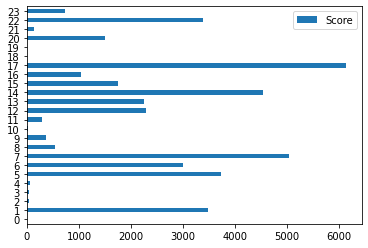

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 75.75093016692516
Test Prediction  75.95385061518705


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  91.86000396589333


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.41615089890952


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.19335675051275


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.1064384946287


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  93.08407480106725


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  91.76040821059956


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  20.554984583761563


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
18,cache_coherence_flit_index,3.479906
15,packet_count_index,2.637921
8,hop_count,0.787605
11,enqueue_time,0.457381
10,hop_percentage,0.421228
17,port_index,0.305536
1,inport,0.245688
6,vc,0.205307
4,flit_type,0.049530
22,vnet_vc_index,-0.073820


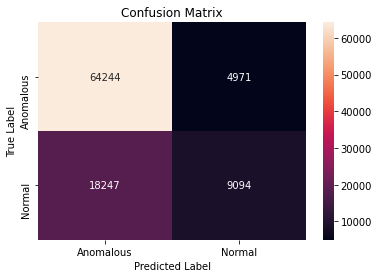

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85     69215
           1       0.65      0.33      0.44     27341

    accuracy                           0.76     96556
   macro avg       0.71      0.63      0.64     96556
weighted avg       0.74      0.76      0.73     96556



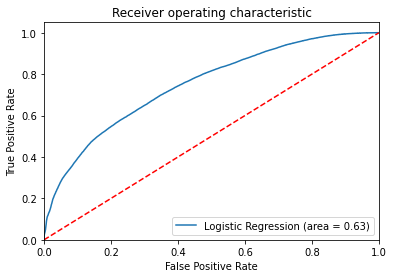

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

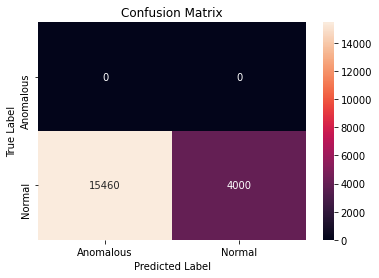

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.21      0.34     19460

    accuracy                           0.21     19460
   macro avg       0.50      0.10      0.17     19460
weighted avg       1.00      0.21      0.34     19460



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 88.73546492811111
Test Prediction  83.54737147354902


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  93.94209795756494


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  90.7385794282346


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  90.83665338645417


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  90.49740250581792


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  92.76554731484855


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  88.50052186014148


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  27.538540596094553


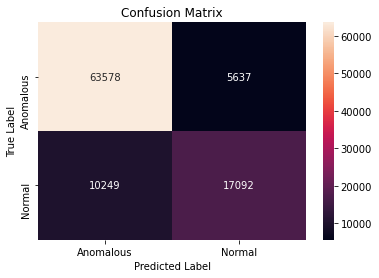

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     69215
           1       0.75      0.63      0.68     27341

    accuracy                           0.84     96556
   macro avg       0.81      0.77      0.79     96556
weighted avg       0.83      0.84      0.83     96556



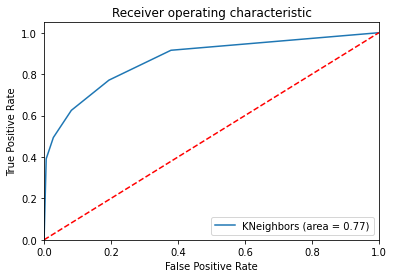

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

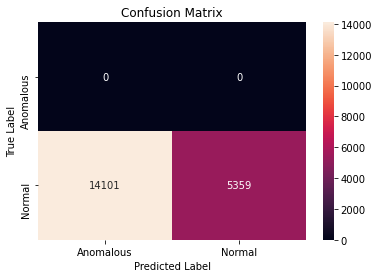

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.28      0.43     19460

    accuracy                           0.28     19460
   macro avg       0.50      0.14      0.22     19460
weighted avg       1.00      0.28      0.43     19460



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 65.10521178289115
Test Prediction Score 65.13111562202245


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 61.82497190825566


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  64.31712348953728


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  63.112048846035975


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  64.37201758303755


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  65.05012987928866


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  61.43917430128726


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  77.08119218910586


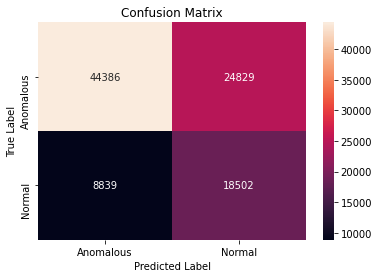

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.83      0.64      0.73     69215
           1       0.43      0.68      0.52     27341

    accuracy                           0.65     96556
   macro avg       0.63      0.66      0.62     96556
weighted avg       0.72      0.65      0.67     96556



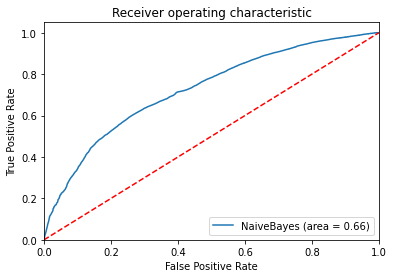

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 308976 samples, validate on 77245 samples
Epoch 1/10
308976/308976 [==============================] - 12s 38us/step - loss: 0.1745 - accuracy: 0.7495 - val_loss: 0.1678 - val_accuracy: 0.7622
Epoch 2/10
308976/308976 [==============================] - 11s 37us/step - loss: 0.1670 - accuracy: 0.7631 - val_loss: 0.1660 - val_accuracy: 0.7644
Epoch 3/10
308976/308976 [==============================] - 11s 37us/step - loss: 0.1660 - accuracy: 0.7642 - val_loss: 0.1654 - val_accuracy: 0.7649
Epoch 4/10
308976/308976 [==============================] - 11s 37us/step - loss: 0.1655 - accuracy: 0.7646 - val_loss: 0.1649 - val_accuracy: 0.7646
Epoch 5/10
308976/308976 [==============================] - 11s 37us/step - loss: 0.1653 - accuracy: 0.7653 - val_loss: 0.1646 - val_accuracy: 0.7654
Epoch 6/10
308976/308976 [==============================] - 11s 37us/step - loss: 0.1651 - accuracy: 0.7654 - val_loss: 0.1645 - val_accuracy: 0.7657
Epoch 7/10
308976/308976 [=======================

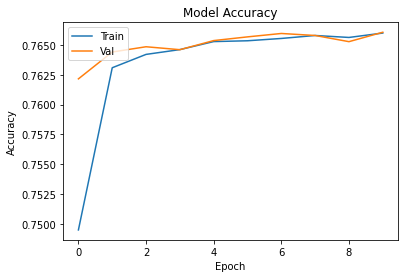

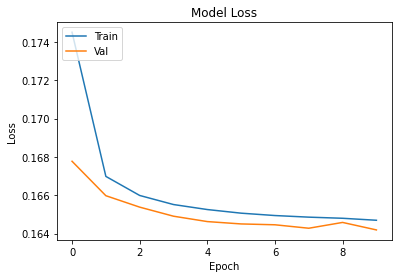

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.89%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 91.75%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.95%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.88%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.51%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.46%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.70%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 30.92%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 308976 samples, validate on 77245 samples
Epoch 1/30
308976/308976 [==============================] - 11s 36us/step - loss: 0.2026 - accuracy: 0.7151 - val_loss: 0.1956 - val_accuracy: 0.7159
Epoch 2/30
308976/308976 [==============================] - 11s 37us/step - loss: 0.1855 - accuracy: 0.7319 - val_loss: 0.1726 - val_accuracy: 0.7599
Epoch 3/30
308976/308976 [==============================] - 11s 36us/step - loss: 0.1704 - accuracy: 0.7640 - val_loss: 0.1691 - val_accuracy: 0.7661
Epoch 4/30
308976/308976 [==============================] - 11s 37us/step - loss: 0.1688 - accuracy: 0.7667 - val_loss: 0.1681 - val_accuracy: 0.7674
Epoch 5/30
308976/308976 [==============================] - 11s 37us/step - loss: 0.1679 - accuracy: 0.7679 - val_loss: 0.1672 - val_accuracy: 0.7677
Epoch 6/30
308976/308976 [==============================] - 11s 37us/step - loss: 0.1668 - accuracy: 0.7688 - val_loss: 0.1665 - val_accuracy: 0.7665
Epoch 7/30
308976/308976 [=======================

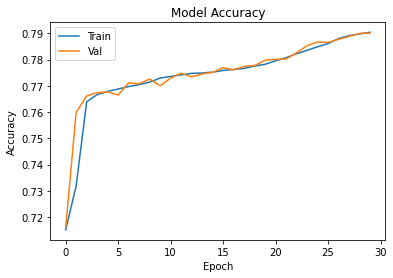

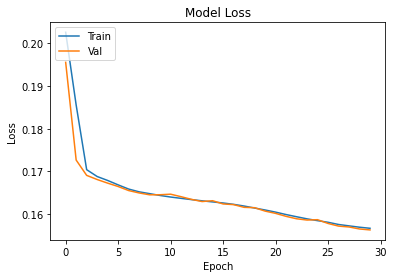

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.15%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 94.32%
accuracy: 91.65%
accuracy: 91.69%
accuracy: 91.92%
accuracy: 93.33%
accuracy: 91.32%
accuracy: 23.49%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 308976 samples, validate on 77245 samples
Epoch 1/30
308976/308976 [==============================] - 13s 41us/step - loss: 0.1846 - accuracy: 0.7289 - val_loss: 0.1743 - val_accuracy: 0.7523
Epoch 2/30
308976/308976 [==============================] - 12s 38us/step - loss: 0.1724 - accuracy: 0.7575 - val_loss: 0.1708 - val_accuracy: 0.7594
Epoch 3/30
308976/308976 [==============================] - 12s 38us/step - loss: 0.1703 - accuracy: 0.7621 - val_loss: 0.1696 - val_accuracy: 0.7623
Epoch 4/30
308976/308976 [==============================] - 12s 38us/step - loss: 0.1694 - accuracy: 0.7636 - val_loss: 0.1688 - val_accuracy: 0.7638
Epoch 5/30
308976/308976 [==============================] - 12s 40us/step - loss: 0.1685 - accuracy: 0.7653 - val_loss: 0.1679 - val_accuracy: 0.7666
Epoch 6/30
308976/308976 [==============================] - 12s 39us/step - loss: 0.1678 - accuracy: 0.7673 - val_loss: 0.1671 - val_accuracy: 0.7675
Epoch 7/30
308976/308976 [=======================

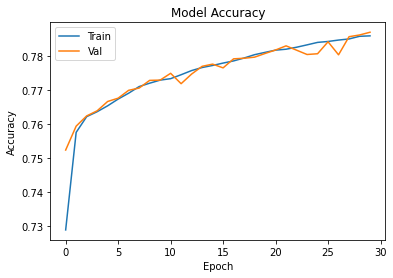

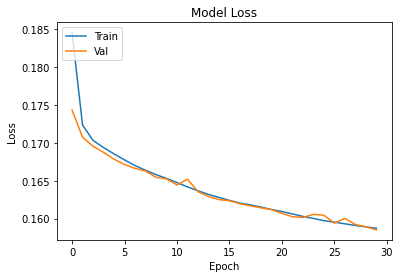

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.77%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.70%
accuracy: 91.33%
accuracy: 91.28%
accuracy: 90.61%
accuracy: 92.53%
accuracy: 90.86%
accuracy: 55.81%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 308976 samples, validate on 77245 samples
Epoch 1/100
308976/308976 [==============================] - 23s 75us/step - loss: 0.1577 - accuracy: 0.7782 - val_loss: 0.1507 - val_accuracy: 0.7859
Epoch 2/100
308976/308976 [==============================] - 21s 67us/step - loss: 0.1511 - accuracy: 0.7885 - val_loss: 0.1454 - val_accuracy: 0.7952
Epoch 3/100
308976/308976 [==============================] - 24s 76us/step - loss: 0.1475 - accuracy: 0.7924 - val_loss: 0.1409 - val_accuracy: 0.7964
Epoch 4/100
308976/308976 [==============================] - 23s 73us/step - loss: 0.1445 - accuracy: 0.7951 - val_loss: 0.1365 - val_accuracy: 0.8018
Epoch 5/100
308976/308976 [==============================] - 23s 73us/step - loss: 0.1414 - accuracy: 0.7999 - val_loss: 0.1329 - val_accuracy: 0.8092
Epoch 6/100
308976/308976 [==============================] - 22s 72us/step - loss: 0.1397 - accuracy: 0.8013 - val_loss: 0.1309 - val_accuracy: 0.8106
Epoch 7/100
308976/308976 [================

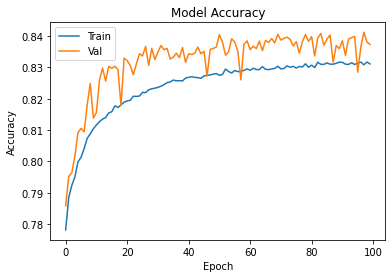

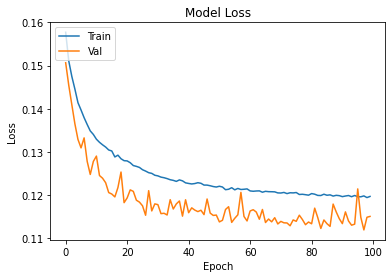

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.59%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.65%
accuracy: 88.00%
accuracy: 87.75%
accuracy: 88.22%
accuracy: 92.23%
accuracy: 86.72%
accuracy: 32.01%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 308976 samples, validate on 77245 samples
Epoch 1/50
308976/308976 [==============================] - 31s 99us/step - loss: 0.1585 - accuracy: 0.7765 - val_loss: 0.1484 - val_accuracy: 0.7928
Epoch 2/50
308976/308976 [==============================] - 29s 93us/step - loss: 0.1506 - accuracy: 0.7887 - val_loss: 0.1446 - val_accuracy: 0.7933
Epoch 3/50
308976/308976 [==============================] - 29s 95us/step - loss: 0.1471 - accuracy: 0.7919 - val_loss: 0.1429 - val_accuracy: 0.7991
Epoch 4/50
308976/308976 [==============================] - 28s 91us/step - loss: 0.1437 - accuracy: 0.7960 - val_loss: 0.1352 - val_accuracy: 0.8038
Epoch 5/50
308976/308976 [==============================] - 30s 98us/step - loss: 0.1418 - accuracy: 0.7976 - val_loss: 0.1383 - val_accuracy: 0.8042
Epoch 6/50
308976/308976 [==============================] - 30s 98us/step - loss: 0.1398 - accuracy: 0.8010 - val_loss: 0.1367 - val_accuracy: 0.8038
Epoch 7/50
308976/308976 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.01%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.13%
accuracy: 86.37%
accuracy: 86.38%
accuracy: 85.25%
accuracy: 94.16%
accuracy: 85.72%
accuracy: 37.25%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.32982152705316
Test Prediction Score 93.2681552674096


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 92.94401480600172
Test Prediction Score 88.0212201591512
Test Prediction Score 89.4139418656734
Test Prediction Score 90.07075527138525
Test Prediction Score 91.13999929477309
Test Prediction Score 89.34361591093587
Test Prediction Score 21.83967112024666


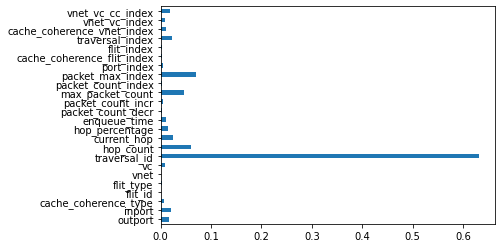

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

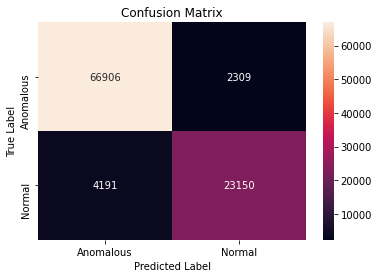

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     69215
           1       0.91      0.85      0.88     27341

    accuracy                           0.93     96556
   macro avg       0.93      0.91      0.92     96556
weighted avg       0.93      0.93      0.93     96556



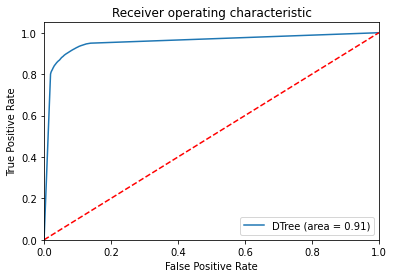

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.9900109004948
Test Prediction Score 94.08115497742243


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 95.40507193689824
Test Prediction Score 90.0218096080165
Test Prediction Score 91.59928334001273
Test Prediction Score 92.30624573940433
Test Prediction Score 93.50250943240988
Test Prediction Score 92.01553983532413
Test Prediction Score 24.96916752312436


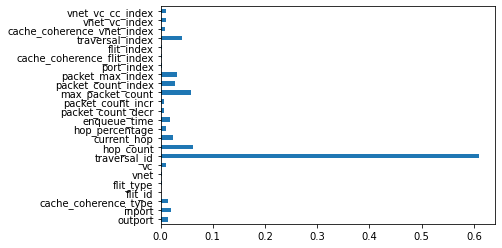

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

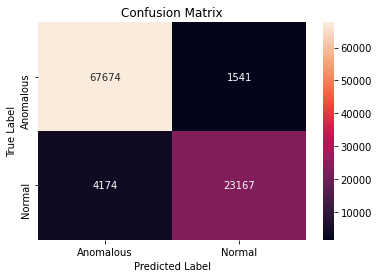

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     69215
           1       0.94      0.85      0.89     27341

    accuracy                           0.94     96556
   macro avg       0.94      0.91      0.92     96556
weighted avg       0.94      0.94      0.94     96556



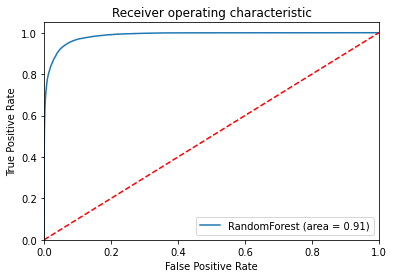

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [68]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [70]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.69266300900262
Test Prediction Score 96.24259497079414


In [71]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 95.8413202018199
Test Prediction Score 90.35425876805188
Test Prediction Score 91.64525330630143
Test Prediction Score 92.60243059636586
Test Prediction Score 92.59041596633718
Test Prediction Score 91.85318334686305
Test Prediction Score 20.5087358684481


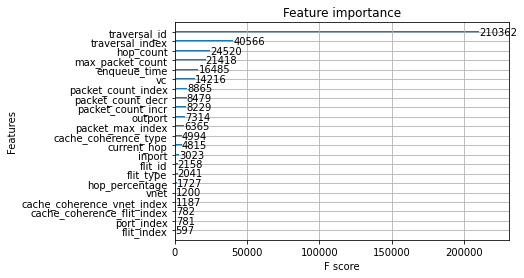

In [72]:
plot_importance(xgbc)
plt.show()

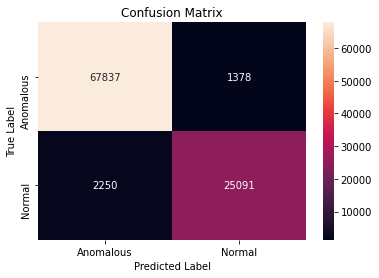

In [73]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [74]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     69215
           1       0.95      0.92      0.93     27341

    accuracy                           0.96     96556
   macro avg       0.96      0.95      0.95     96556
weighted avg       0.96      0.96      0.96     96556



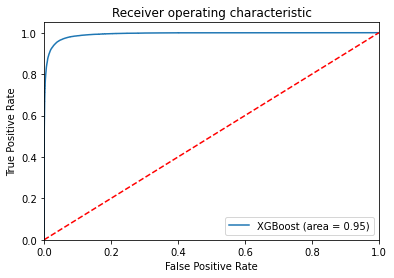

In [75]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [77]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [79]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 88.47706365008635
Test Prediction Score 87.9199635444716


In [80]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 95.81267763897151
Test Prediction Score 92.26289419392867
Test Prediction Score 92.69431151135105
Test Prediction Score 91.96774876001975
Test Prediction Score 95.42425275332337
Test Prediction Score 91.26174185318334
Test Prediction Score 24.07502569373073


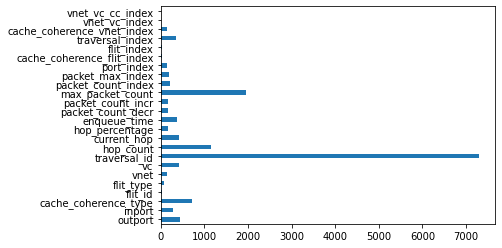

In [81]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

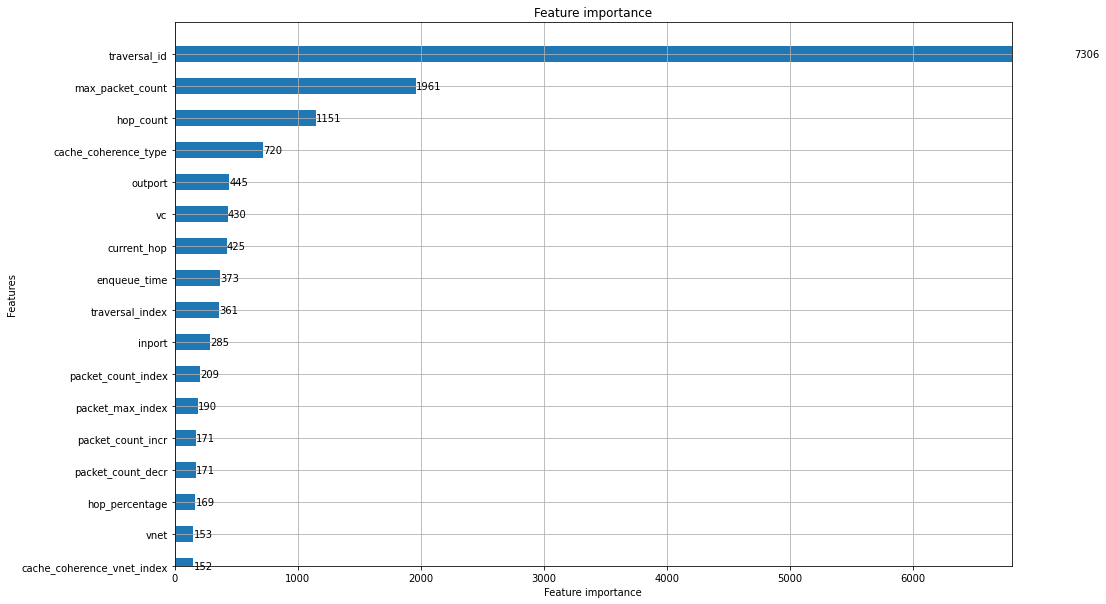

In [82]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [83]:
sorted(gbm.feature_importances_,reverse=True)

[7306,
 1961,
 1151,
 720,
 445,
 430,
 425,
 373,
 361,
 285,
 209,
 190,
 171,
 171,
 169,
 153,
 152,
 140,
 86,
 42,
 35,
 25,
 0,
 0]

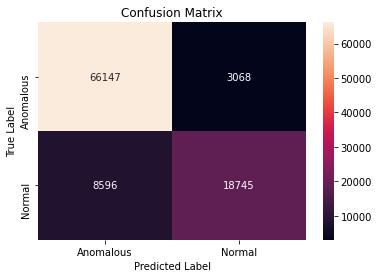

In [84]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [85]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     69215
           1       0.86      0.69      0.76     27341

    accuracy                           0.88     96556
   macro avg       0.87      0.82      0.84     96556
weighted avg       0.88      0.88      0.87     96556



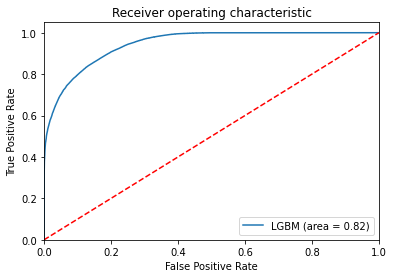

In [86]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()